# Evaluation of the BDT
Using ROOT files directly to make sure the framework implementation is working correctly.

In [13]:
import numpy as np
import pandas as pd
import uproot as up
import boost_histogram as bh
import hist
from hist import Hist
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
hep.style.use(hep.style.ROOT)

regions = {
    'sr1': 1, # signal region 1
    'sr2': 2, # signal region 2
    'k2pi': 3, # K2pi background region
    'kmu2': 4, # Kmu2 background region
    'k3pi': 5, # k3pi background region
    'ups': 6, # upstream backgroun region (-ve mm2)
    'cr1': 10,
    'cr2': 20,
    'crmu': 30,
    'crmu1': 31,
    'crmu2': 32,
    'cr3pi': 40,
    'cr3d': 50,
}

In [5]:
def print_upstream_validation_samples(h):
    h5 = h["Ups5_region"]
    h1 = h["Ups1_region"]
    h7 = h["Ups7_region"]

    h5_xgb = h["Ups5xgb_region"]
    h1_xgb = h["Ups1xgb_region"]
    h7_xgb = h["Ups7xgb_region"]

    print(f"Validation Sample 1 (No VC, No CHANTI, Require Interactions)\nCurrent = {h1.values()[1] + h1.values()[2]}\nXGB = {h1_xgb.values()[1] + h1_xgb.values()[2]}")
    print("\nValidation Sample 3 (Invert GTK extra hits)")
    print(f"\nValidation Sample 5 (Invert VC, No GTK extra hits veto)\nCurrent = {h5.values()[1] + h5.values()[2]}\nXGB = {h5_xgb.values()[1] + h5_xgb.values()[2]}")
    print(f"\nValidation Sample 7 (Invert CHANTI, No GTK extra hits veto)\nCurrent = {h7.values()[1] + h7.values()[2]}\nXGB = {h7_xgb.values()[1] + h7_xgb.values()[2]}")

In [27]:
def print_sampleC_counts(h):
    nSc = h["sampleC_region"].values()[regions['sr1']] + h["sampleC_region"].values()[regions['sr2']]
    nScXGB = h["sampleCxgb_region"].values()[regions['sr1']] + h["sampleCxgb_region"].values()[regions['sr2']]

    nSc_all = h["sampleC_region"].values().sum()
    nScXGB_all = h["sampleCxgb_region"].values().sum()

    print(f"SampleC SR (Current) = {nSc}")
    print(f"SampleC SR (XGB BDT) = {nScXGB}")
    print(f"SampleC All Kine (Current) = {nSc_all}")
    print(f"SampleC All Kine (XGB BDT) = {nScXGB_all}")

In [33]:
def print_region_counts(h, includeSignalRegion=False):
    rois = ['k3pi', 'k2pi', 'kmu2']
    if includeSignalRegion:
        rois += ['sr1', 'sr2']
    for bkg in rois:
        n = h["signal_region"].values()[regions[bkg]]
        nXGB = h["signalxgb_region"].values()[regions[bkg]]
        print(f"N({bkg}) Current = {n}\tN({bkg}) XGB BDT = {nXGB}")

Now lets print the region counts just so we can see more easily any actual difference.

In [24]:
# Data file
h_data = {}
with up.open("./data/Kaon7/PnnAnalysis_2022_Data_Mismatch_XGBKaon7_StaticThresh.root:PNNAnalysis") as f:
    for k in f.keys():
        h_data[k.replace(";1","")] = f[k].to_hist()

In [50]:
h_ke4 = {}
with up.open("./data/BBFails/Ke4_Noov_BBFail_ANTI0Ups_NoGTK_Static.root:PNNAnalysis") as f:
    for k in f.keys():
        h_ke4[k.replace(";1","")] = f[k].to_hist()

In [38]:
h_pnn = {}
with up.open("./data/BBFails/KpinnNoov_Ups_BBFail_ANTI0Ups_NoGTK_Static.root:PNNAnalysis") as f:
    for k in f.keys():
        h_pnn[k.replace(";1","")] = f[k].to_hist()

In [25]:
print_upstream_validation_samples(h_data)

Validation Sample 1 (No VC, No CHANTI, Require Interactions)
Current = 12.0
XGB = 14.0

Validation Sample 3 (Invert GTK extra hits)

Validation Sample 5 (Invert VC, No GTK extra hits veto)
Current = 8.0
XGB = 13.0

Validation Sample 7 (Invert CHANTI, No GTK extra hits veto)
Current = 19.0
XGB = 26.0


In [28]:
print_sampleC_counts(h_data)

SampleC SR (Current) = 38.0
SampleC SR (XGB BDT) = 27.0
SampleC All Kine (Current) = 2342.0
SampleC All Kine (XGB BDT) = 1904.0


In [35]:
print_region_counts(h_data, includeSignalRegion=False)

N(k3pi) Current = 14438.0	N(k3pi) XGB BDT = 12263.0
N(k2pi) Current = 630.0	N(k2pi) XGB BDT = 592.0
N(kmu2) Current = 25606.0	N(kmu2) XGB BDT = 23746.0


In [51]:
print_region_counts(h_ke4, includeSignalRegion=True)

N(k3pi) Current = 44.0	N(k3pi) XGB BDT = 29.0
N(k2pi) Current = 0.0	N(k2pi) XGB BDT = 0.0
N(kmu2) Current = 0.0	N(kmu2) XGB BDT = 0.0
N(sr1) Current = 0.0	N(sr1) XGB BDT = 0.0
N(sr2) Current = 17.0	N(sr2) XGB BDT = 15.0


In [39]:
print_region_counts(h_pnn, includeSignalRegion=True)

N(k3pi) Current = 252339.0	N(k3pi) XGB BDT = 218098.0
N(k2pi) Current = 228786.0	N(k2pi) XGB BDT = 235729.0
N(kmu2) Current = 307.0	N(kmu2) XGB BDT = 313.0
N(sr1) Current = 192584.0	N(sr1) XGB BDT = 201269.0
N(sr2) Current = 1062245.0	N(sr2) XGB BDT = 1060353.0


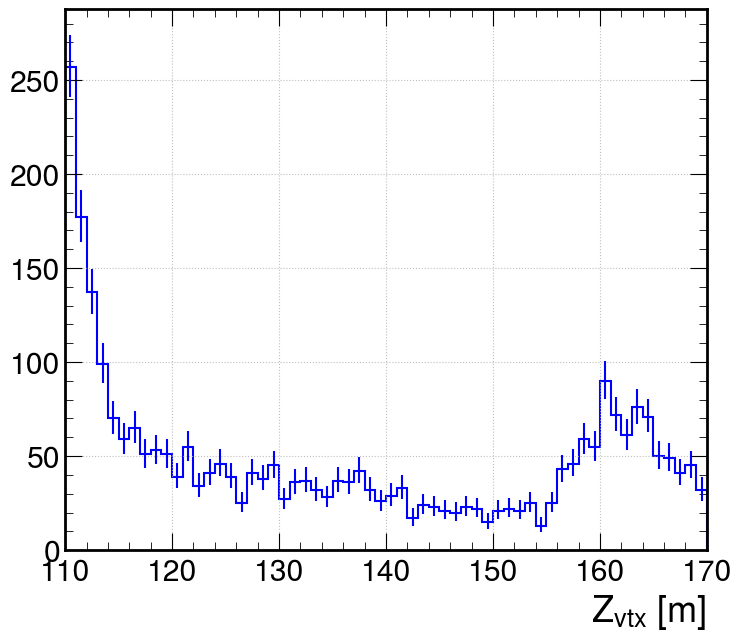

In [48]:
plt.figure(figsize=(8,7))
h_pnn["special_training_zvtx"][::bh.rebin(4)].plot(color="blue")
plt.grid()
plt.xlabel(r"$Z_{vtx}$ [m]")
plt.xlim(110, 170)
plt.tight_layout()
plt.savefig("./plots/beamBackground_enhanced_training_sample_Zvtx.pdf")
plt.show()

/var/folders/vr/fcpvsfqx4lvgx3dffz044w2m0000gn/T/ipykernel_992/4290459264.py:9: RuntimeWarning: invalid value encountered in divide
  yerr = np.sqrt((erra / h['signal_cda'].values())**2 + ((errb * h['signalxgb_cda'].values()) / (h['signal_cda'].values())**2)**2)
/var/folders/vr/fcpvsfqx4lvgx3dffz044w2m0000gn/T/ipykernel_992/4290459264.py:13: RuntimeWarning: invalid value encountered in divide
  h['signalxgb_cda'].values() / h['signal_cda'].values(),


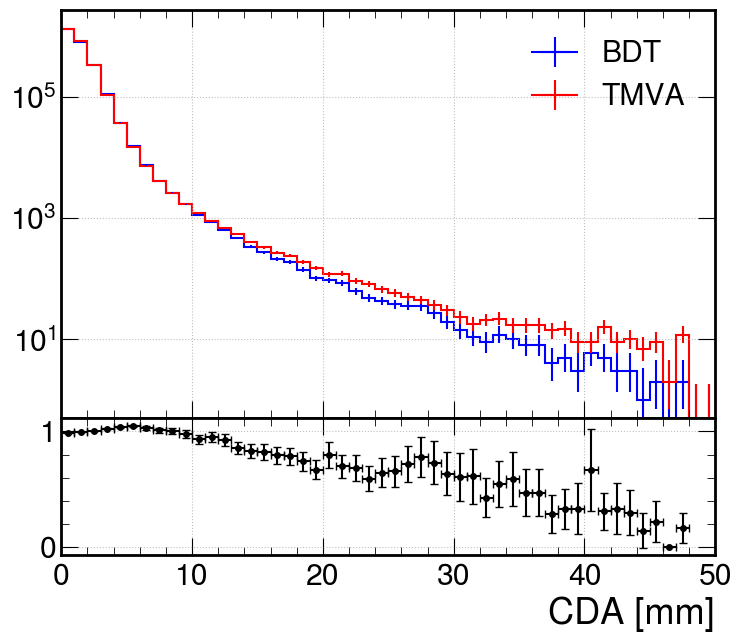

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(8,7), sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
ax = ax.flatten()
hep.histplot(h['signalxgb_cda'], label="BDT", ax=ax[0], color="blue")
hep.histplot(h['signal_cda'], label="TMVA", ax=ax[0], color="red")

#yerr = err(f(a/b))^2 = (err(a)/b)^2 + (-a/b^2 * err(b))^2
erra = np.sqrt(h['signalxgb_cda'].values())
errb = np.sqrt(h['signal_cda'].values())
yerr = np.sqrt((erra / h['signal_cda'].values())**2 + ((errb * h['signalxgb_cda'].values()) / (h['signal_cda'].values())**2)**2)

ax[1].errorbar(
    h['signal_cda'].axes[0].centers, 
    h['signalxgb_cda'].values() / h['signal_cda'].values(), 
    xerr=(h['signal_cda'].axes[0].centers[1] - h['signal_cda'].axes[0].centers[0]) / 2,
    fmt='o',
    markersize=4,
    capsize=3,
    yerr=yerr,
    color='k'
)
ax[1].set_xlabel("CDA [mm]")
ax[0].legend()
ax[0].set_xlabel("")
ax[0].set_xlim(0,50)
ax[1].set_xlim(0,50)
ax[0].grid()
ax[1].grid()
ax[0].set_yscale('log')
#ax[1].set_xticklabels([])
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [19]:
h["signal_region"].values()[1:3].sum(), h["signalxgb_region"].values()[1:3].sum()

(1254829.0, 1261622.0)

In [15]:
x0 = h["signal_region"].values()[1:3].sum()
x1 = h["signalxgb_region"].values()[1:3].sum()

x1 / x0

1.009046650977942

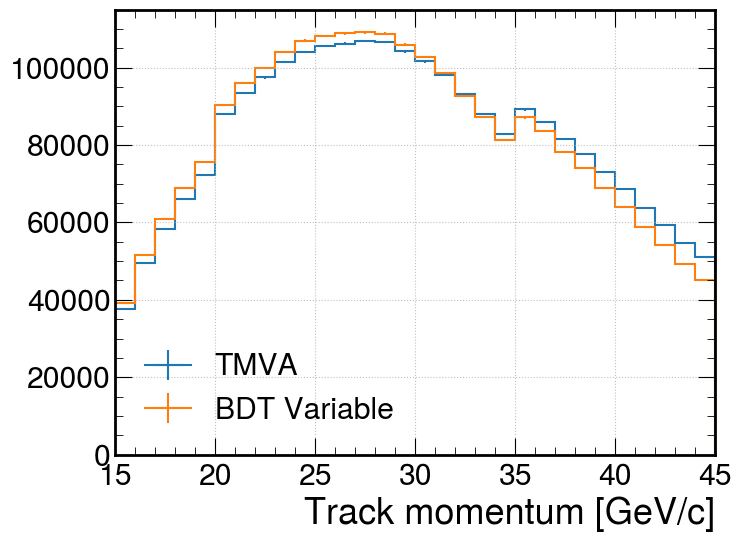

In [16]:
plt.figure(figsize=(8, 6))
hep.histplot(h["signal_mm2_v_p"].project('xaxis'), label="TMVA")
hep.histplot(h["signalxgb_mm2_v_p"].project('xaxis'), label="BDT Variable")
plt.xlim(15, 45)
plt.xlabel("Track momentum [GeV/c]")
plt.legend()
plt.grid()
plt.tight_layout()